In [110]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
from NeuralFlow.flow import Flow, Flow_v2

In [111]:
def create_base_model(input_shape=1, output_shape=1):
    inputs = tf.keras.Input(shape=(input_shape,))
    x = tf.keras.layers.Dense(512, activation='relu')(inputs)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    outputs = tf.keras.layers.Dense(output_shape, activation='tanh')(x)
    return tf.keras.Model(inputs, outputs)


In [112]:
flow = Flow_v2(
    model_fn = create_base_model,
    n_models = 3,
    noise_stddev=0.01, 
    lam = 1.0)

In [113]:
def loss_fn(y_true, y_pred):
    return tf.reduce_sum(tf.square(y_true - y_pred))

flow.compile(optimizer_fn=lambda :tf.keras.optimizers.Adam(1e-3), loss_fn=loss_fn, metrics=['mae'])

In [114]:
X_train = tf.cast(np.linspace(0, 1, 1000).reshape(-1, 1), tf.float32)
y_train = tf.cast(np.sin(X_train * 2 * np.pi).reshape(-1, 1), tf.float32)

batch_size = 32
loader_size = X_train.shape[0] // batch_size

In [115]:
flow.fit(X_train, y_train, batch_size=batch_size, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.7845 - mae: 0.5183  
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8764 - mae: 0.2873 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0920 - mae: 0.1766 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.9558 - mae: 0.1336
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9700 - mae: 0.1273
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.8534 - mae: 0.1168
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 0.9461 - mae: 0.1240
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.8730 - mae: 0.1223
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.8970 - mae: 0.1261
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 0.7046 - mae: 0.1084
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 0.8098 - mae: 0.1313
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 0.7297 - mae: 0.1289
Epoch 13/100
32/3

In [118]:
est = flow.get_estimator("importance_sampling")

[[0.09198736 0.27598986 0.07690953]] [[0.06629824 0.06637267 0.06643415]]


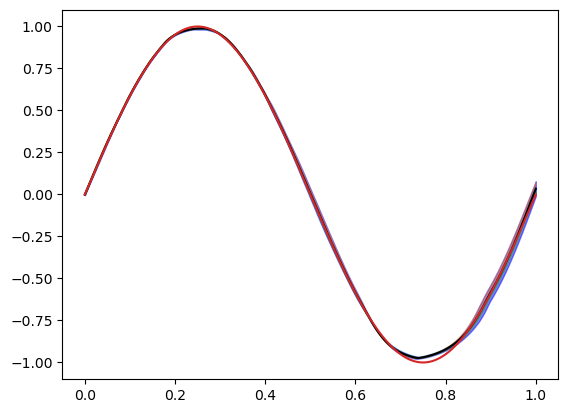

In [ ]:
import matplotlib.pyplot as plt

# print(est.logp, est.logq)
mean, var = est(X_train)

fig = plt.figure()

for model in flow.models:
    plt.plot(X_train, model(X_train), alpha=0.5)

plt.plot(X_train, mean.squeeze(), color='black')
plt.fill_between(tf.squeeze(X_train), mean.squeeze() - 1.96 * np.sqrt(var.squeeze()),  mean.squeeze() + 1.96 * np.sqrt(var.squeeze()), color='blue', alpha=0.5)


plt.plot(X_train, y_train)